<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Материалы" data-toc-modified-id="Материалы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Материалы</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация-о-датасете" data-toc-modified-id="Общая-информация-о-датасете-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общая информация о датасете</a></span></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Анализ-выбросов" data-toc-modified-id="Анализ-выбросов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ выбросов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Среднестатистический-портрет-клиента" data-toc-modified-id="Среднестатистический-портрет-клиента-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Среднестатистический портрет клиента</a></span></li><li><span><a href="#Распределение-признаков-по-группам:-ушёл-/-остался" data-toc-modified-id="Распределение-признаков-по-группам:-ушёл-/-остался-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Распределение признаков по группам: ушёл / остался</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Сравнение-среднего-дохода-у-ушедших-и-оставшихся-клиентов" data-toc-modified-id="Сравнение-среднего-дохода-у-ушедших-и-оставшихся-клиентов-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Сравнение среднего дохода у ушедших и оставшихся клиентов</a></span></li><li><span><a href="#Сравнение-активности-ушедших-и-оставшихся-клиентов" data-toc-modified-id="Сравнение-активности-ушедших-и-оставшихся-клиентов-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Сравнение активности ушедших и оставшихся клиентов</a></span></li></ul></li><li><span><a href="#Общие-выводы-и-рекомендации" data-toc-modified-id="Общие-выводы-и-рекомендации-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общие выводы и рекомендации</a></span></li></ul></div>

# Банки - Анализ оттока клиентов

## Материалы
[Презентация](https://disk.yandex.ru/i/AwLUBPonHPWScg)
[Дашборд](https://public.tableau.com/views/Bank_16529810168700/Bank?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

**Цель:**
- исследовать возможные причины ухода клиентов банка "Метанпром" и разработать рекомендации по их удержанию.

**Задачи:**
- провести исследовательский анализ данных;
- выделить портреты клиентов, которые склонны уходить из банка;
- проверить гипотезы;
- cформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.

**Гипотезы:**
1. различие дохода между теми клиентами, которые ушли, и теми, которые остались;
2. выбрать одну из возможных гипотез:
    - различие в количестве продуктов, которыми пользуются клиенты,
    - различие в балансе на счете,
    - различие доли ушедших по городам расположения банков,
    - влияние возраста на уход из банка,
    - различия в баллах кредитного скоринга и наличие кредитной карты.

**Описание данных:**
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## Загрузка данных

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy import stats as st

Прочитаем файл:

In [2]:
df = pd.read_csv('bank_dataset.csv')

## Подготовка данных

**Этапы:**
- Изучить общую информацию о датасете;
- Заменить названия столбцов при необходимости;
- Откорректировать типы данных при необходимости;
- Обработать пропуски, дубликаты;
- Проанализировать выбросы.

### Общая информация о датасете

Напишем функцию для просмотра и получения общей информации о данных:

In [3]:
def inspect(df):
    df.columns = [x.lower() for x in df.columns.values]
    display(df.head()) 
    df.info()
    print ('Количество дубликатов -', df.duplicated().sum())
    return df

Просмотрим данные, применив функцию:

In [4]:
df = inspect(df)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
Количество дубликатов - 0


- Датафрейм достаточно большой для анализа: 10000 наблюдений и 12 полей - уникальный ID клиента, 10 признаков и целевая переменная.
- Не все признаки численные, а значит есть необходимость преобразования категориальных данных в числовые для применения алгоритмов.
- Присутствуют пропуски значений в столбце `balance` (баланс на счете). Пропуски следует проанализировать.
- Дубликатов в данных нет.

### Преобразование типов данных

Выполним преобразование категориальных переменных в числовые. Для этого используем класс LabelEncoder() из модуля sklearn.preprocessing:

In [5]:
# создадим переменную класса LabelEncoder - кодировщик
encoder =  LabelEncoder()

# используем цикл для замены категорий числовыми лейблами
columns = ['city', 'gender']
for column in columns:
    print(df[column].unique())
    df[column] = encoder.fit_transform(df[column]) # используем кодировщик, чтобы "перевести" строковые названия в числа
    print(df[column].unique())
    print(40*'*')

['Ярославль' 'Рыбинск' 'Ростов Великий']
[2 1 0]
****************************************
['Ж' 'М']
[0 1]
****************************************


### Обработка пропусков

Проверим, есть ли какие-то признаки/категории, где пропуски значений в столбце `balance` преобладают.

Для этого категоризируем данные по остатку на счете на две группы: группа с положительным (или нулевым) балансом и группа с пропущенными значениями. А затем построим гистограммы по этим двум категориям для сравнения.

In [6]:
# напишем функцию для категоризации данных по остатку на счете
def balance_group (balance):
    if balance >= 0:
        return 'баланс (+)'
    return 'баланс NaN'

# добавим столбец `balance_group`, содержащий категории
df['balance_group'] = df['balance'].apply(balance_group)
# проверим корректность заполнения категорий (положительный баланс должен быть в 6383 случаях)
df['balance_group'].value_counts()

баланс (+)    6383
баланс NaN    3617
Name: balance_group, dtype: int64

In [7]:
# определим функцию отрисовки графиков признаков для групп
def show_clusters(df, cluster_name, feature):
    for f in feature:
        if f == cluster_name: continue
        sns.histplot(data=df, x=f, hue=cluster_name, element="step")
        plt.title(f'Распределение по признаку - {f}')
        plt.ylabel('Количество клиентов')
        plt.show();

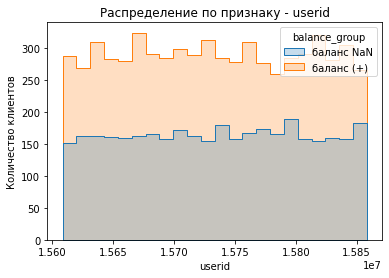

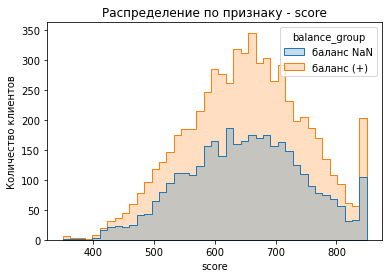

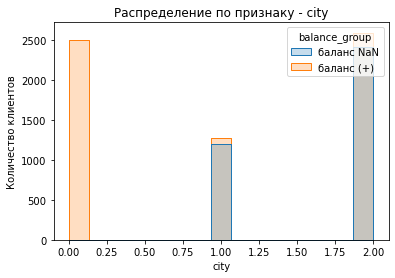

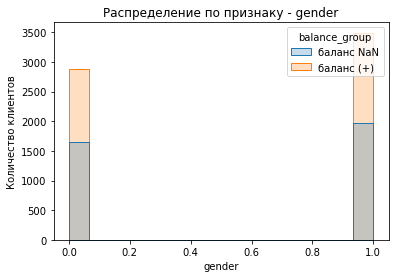

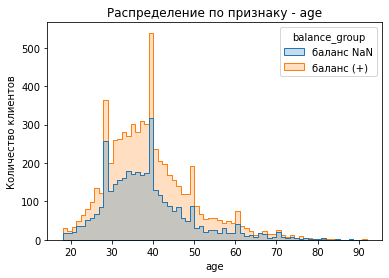

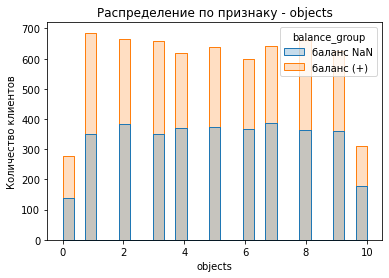

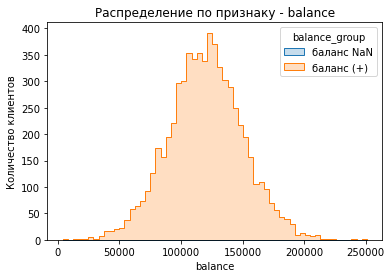

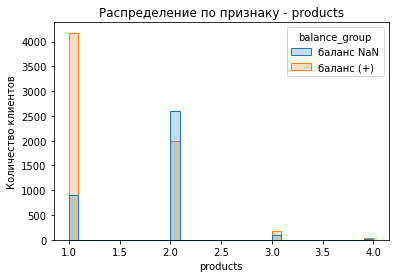

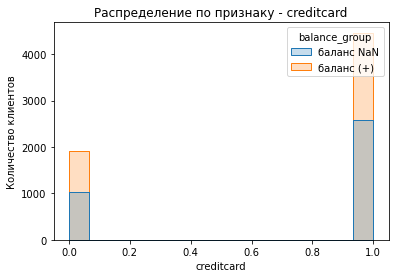

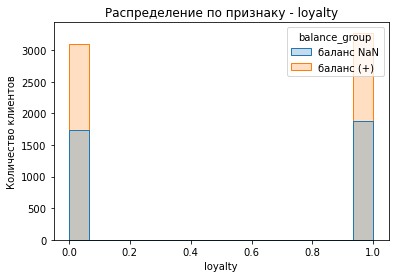

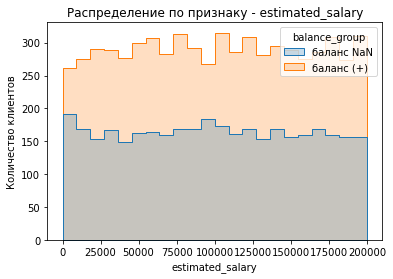

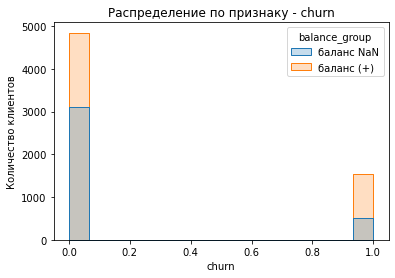

In [8]:
# отрисуем графики признаков для групп
show_clusters(df, 'balance_group', df.columns)

- На гистограммах по признакам `score`, `age` и `products` присутствует скошенность данных, что может говорить о наличии выбросов. Поработаем с выбросами позже.
- Пропуски преобладают в случаях, когда клиент пользуется двумя продуктами. Мы не знаем, какие именно эти продукты.
- В банках Ростова Великого пропусков нет. Возможно клиенты этих банков пользуются только одним продуктом. Проверим предположение, построив гистограмму распределения клиентов в разрезе признаков `products/city`.

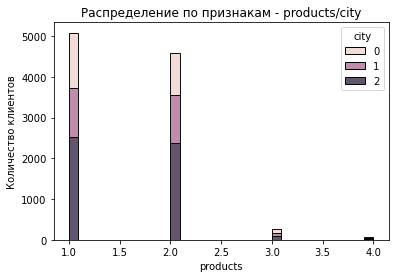

In [9]:
sns.histplot(data=df, x='products', hue='city', multiple="stack")
plt.title(f'Распределение по признакам - products/city')
plt.ylabel('Количество клиентов')
plt.show();

- В Ростове Великом, как и в прочих городах, имеется достаточное количество клиентов, использующих два продукта. Предположение не подтвердилось. Возможно пропуски связаны с недобросовестным заполнением данных, или набор продуктов в разных городах отличается. Поэтому пропуски заполнять не будем, так как это может повлиять на общую картину.

Для дальнейшего анализа столбец `balance_group` будет мешать. Уберем его:

In [10]:
df = df.drop(columns= ['balance_group', 'userid'], axis=1)
df.head()

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,619,2,0,42,2,NaN,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,2,0,42,8,159660.80,3,1,0,113931.57,1
3,699,2,0,39,1,NaN,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


### Анализ выбросов

На гистограммах по признакам `score`, `age` и `products` мы отметили скошенность данных, что может говорить о наличии выбросов. 

Построим диаграммы размаха для этих столбцов:

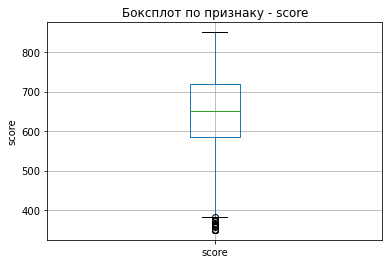

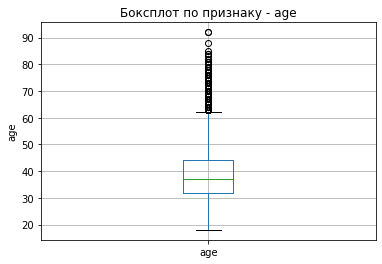

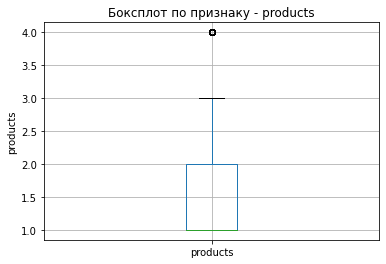

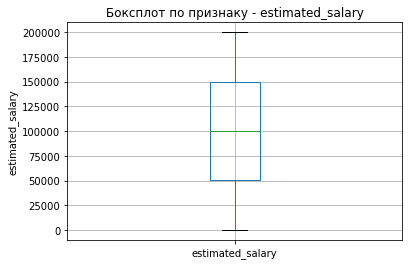

In [11]:
# создадим список с необходимыми названиями колонок-признаков
columns = ['score', 'age', 'products', 'estimated_salary']

# построим боксплоты по признакам, "оберенем" их в цикл
for column in columns:
    df.boxplot(column)
    plt.title(f'Боксплот по признаку - {column}')
    plt.ylabel(column)
    plt.show();

Наблюдаем выбросы в данных:
- `score` < 385,
- `age` > 62,
- `objects` > 3.

Посмотрим, сколько процентов от всех данных составляют эти выбросы:

In [12]:
len(df.query('age > 62 or score < 385 or products > 3')) /len(df)

0.0433

- Выбросы составляют менее 5% данных. Избавимся от них.

In [13]:
df = df.query('age <= 62 and score >= 385 and products <= 3')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9567 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score             9567 non-null   int64  
 1   city              9567 non-null   int32  
 2   gender            9567 non-null   int32  
 3   age               9567 non-null   int64  
 4   objects           9567 non-null   int64  
 5   balance           6102 non-null   float64
 6   products          9567 non-null   int64  
 7   creditcard        9567 non-null   int64  
 8   loyalty           9567 non-null   int64  
 9   estimated_salary  9567 non-null   float64
 10  churn             9567 non-null   int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 822.2 KB


**Выводы:**
- Датафрейм достаточно большой для анализа: 10000 наблюдений и 12 полей - уникальный ID клиента, 10 признаков и целевая переменная.
- Дубликатов в данных нет.
- Пропуски в столбце `balance` преобладают в случаях, когда клиент пользуется двумя продуктами. При этом в банках Ростова Великого пропусков нет, хотя клиентов, использующих два продукта, достаточно. Возможно пропуски связаны с недобросовестным заполнением данных, или набор продуктов в разных городах отличается. Заполнение пропусков не целесообразно.
- Для применения алгоритмов машинного обучения категориальные данные преобразовали в числовые.
- На гистограммах по признакам `score`, `age` и `products` присутствует скошенность данных, что может говорить о наличии выбросов. Проанализировав данные, отметили, что все выбросы составляют менее 5% данных. Очистили данные от выбросов для дальнейшего анализа.

## Исследовательский анализ данных

**Этапы:**
- Изучить средние и медианные значения для представления о среднестатистическом клиенте банка.
- Изучить средние значения и стандартные отклонения в двух группах - тех, кто ушел, и тех, кто остался.
- Построить столбчатые гистограммы распределения признаков для этих двух групп.
- Построить матрицу корреляций и отобразить ее.

### Среднестатистический портрет клиента

Изучим средние и медианные значения для представления о среднестатистическом клиенте банка:

In [14]:
df.describe()

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,9567.000000,9567.000000,9567.000000,9567.000000,9567.000000,6102.000000,9567.000000,9567.000000,9567.000000,9567.000000,9567.000000
mean,650.718721,1.250862,0.547298,37.734713,5.015052,119833.699579,1.516045,0.705237,0.503711,100090.253758,0.197554
std,96.059543,0.830246,0.497784,8.782816,2.887859,30117.958823,0.549769,0.455960,0.500012,57524.690666,0.398175
min,386.000000,0.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,100116.707500,1.000000,0.000000,0.000000,51013.655000,0.000000
50%,652.000000,2.000000,1.000000,37.000000,5.000000,119791.215000,1.000000,1.000000,1.000000,100127.710000,0.000000
75%,717.000000,2.000000,1.000000,43.000000,7.000000,139542.510000,2.000000,1.000000,1.000000,149464.930000,0.000000
max,850.000000,2.000000,1.000000,62.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000


- По средним и медианным значениям можно составить предварительный среднестатистический портрет клиента. Это мужчины и женщины молодого возраста (средний возраст - 37 лет), преимущественно клиенты банка г.Ярославля, пользующиеся 1-2 продуктами (довольно часто 1 из них - кредитная карта). Клиенты в среднем зарабатывают около 100000 руб. и имеют в собственности 5 объектов. Средний балл кредитного скоринга равен 650. Баланс на счету в среднем 120000 руб. Клиенты уходят из банка в 20% случаев.

### Распределение признаков по группам: ушёл / остался

Посмотрим на статистические показатели признаков в двух группах - тех, кто ушел в отток, и тех, кто остался.

In [15]:
df.pivot_table(
    index = 'churn', 
    values=df.columns.values,
    aggfunc=['mean', 'median', np.var, np.std]
).T.style.format('{:.2f}')

- Заметна разница средних показателей у групп в зависимости от города расположения банка, пола, возраста и активности клиента, количества используемых продуктов.
- Уровень дохода клиента, количество объектов в собственности, наличие кредитной карты и баллы кредитного скоринга, остаток на счету - похоже, не сильно влияют на решение клиента уйти или остаться.

Изучим распределение признаков для двух групп на столбчатых гистограммах.

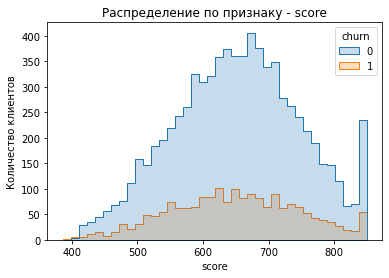

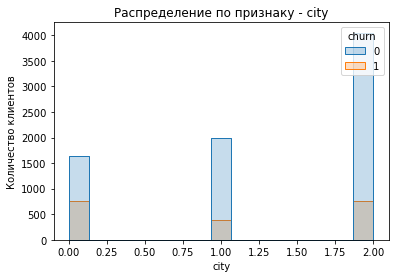

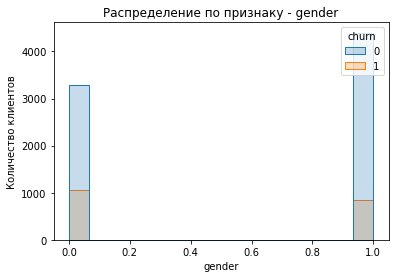

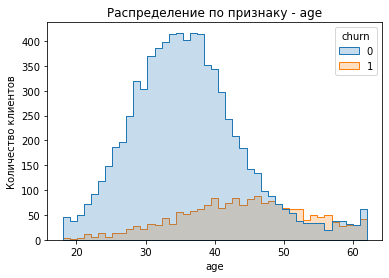

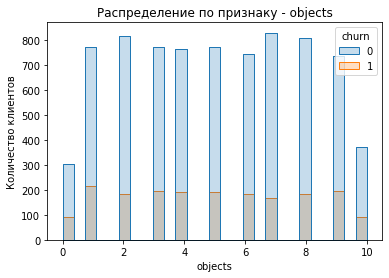

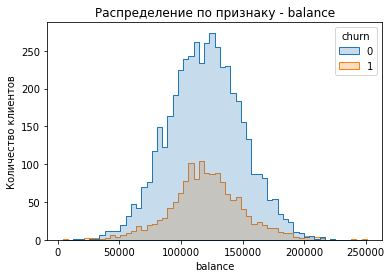

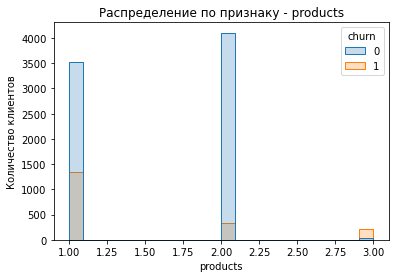

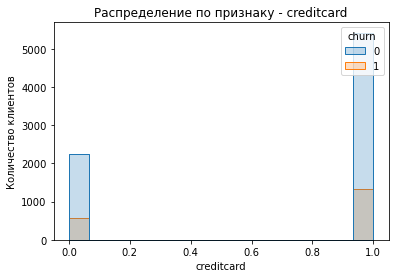

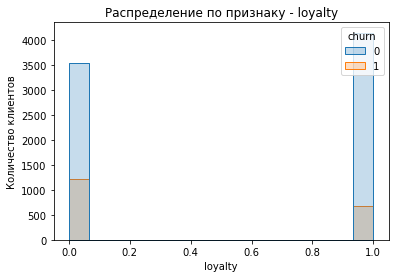

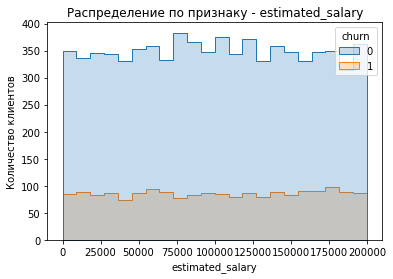

In [16]:
show_clusters(df, 'churn', df.columns)

На удержание клиентов влияют следующие признаки:
- город расположения банка - в Ярославле и Рыбинске ситуация с удержанием клиентов значительно лучше, чем в Ростове Великом;
- мужчины чаще остаются клиентами банка, чем женщины;
- большинство оставшихся клиентов - люди 30-40 лет, чаще уходят клиенты в возрасте 40-60 лет;
- клиенты, пользующиеся двумя продуктами, реже уходят, чем те, кто пользуется одним продуктом;
- активность клиента - важный признак удержания.


Построим матрицу корреляций и изучим степень корреляции между признаками:

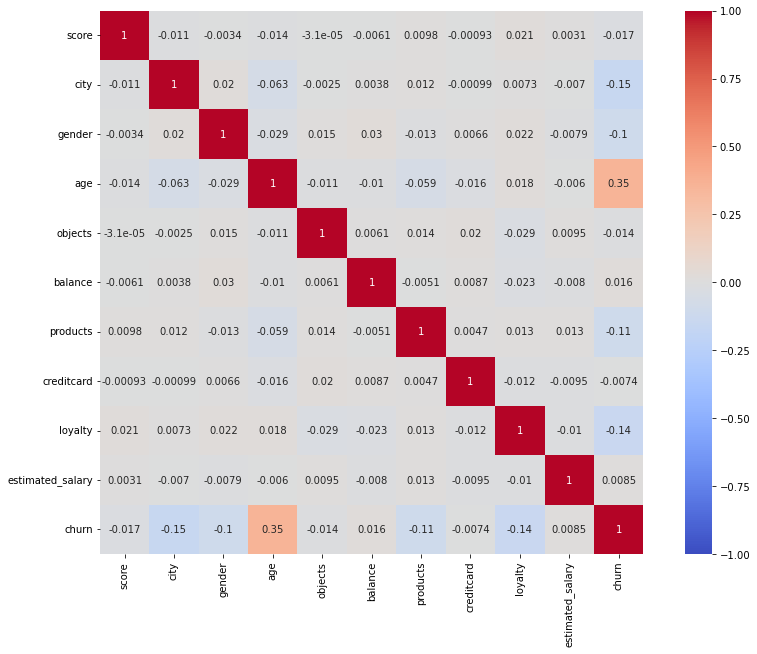

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap= 'coolwarm', square=True, vmin=-1, vmax=1);

Признаки, наиболее заметно коррелирующие с целевой переменной (в порядке убывания силы корреляции):
- `age` (возраст),
- `city` (город),
- `loyalty` (активность клиента),
- `products` (количество продуктов, которыми пользуется клиент),
- `gender` (пол).

**Выводы:**

Среднестатистический портрет клиента:
- мужчины и женщины молодого возраста (средний возраст - 37 лет),
- клиенты банка г.Ярославля,
- пользуются 1-2 продуктами (довольно часто 1 из них - кредитная карта),
- средняя заработная плата клиента - 100000 руб.,
- имеют в собственности около 5 объектов,
- средний балл кредитного скоринга равен 650,
- баланс на счету около 120000 руб.,
- клиенты уходят из банка в 20% случаев.


Признаки, наиболее заметно коррелирующие с целевой переменной (в порядке убывания силы корреляции):
- `age` (возраст) - умеренная корреляция,
- `city` (город) - слабая корреляция,
- `loyalty` (активность клиента) - слабая корреляция,
- `products` (количество продуктов, которыми пользуется клиент) - слабая корреляция,
- `gender` (пол) - слабая корреляция.

## Кластеризация клиентов

- Стандартизировать данные.
- Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму для определения оптимального количества кластеров.
- Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов.
- Изучить средние значения признаков для кластеров.
- Построить распределения признаков для кластеров.
- Определить, какие кластеры склонны к оттоку, а какие — надёжны.

Для проведения кластеризации и проверки гипотез исключим столбец `balance`, в котором встречается 36% пропусков:

In [18]:
df = df.drop(columns='balance', axis=1)

Стандартизируем данные:

In [19]:
sc = StandardScaler()
X_sc = sc.fit_transform(df)

Построим матрицу расстояний и нарисуем дендрограмму:

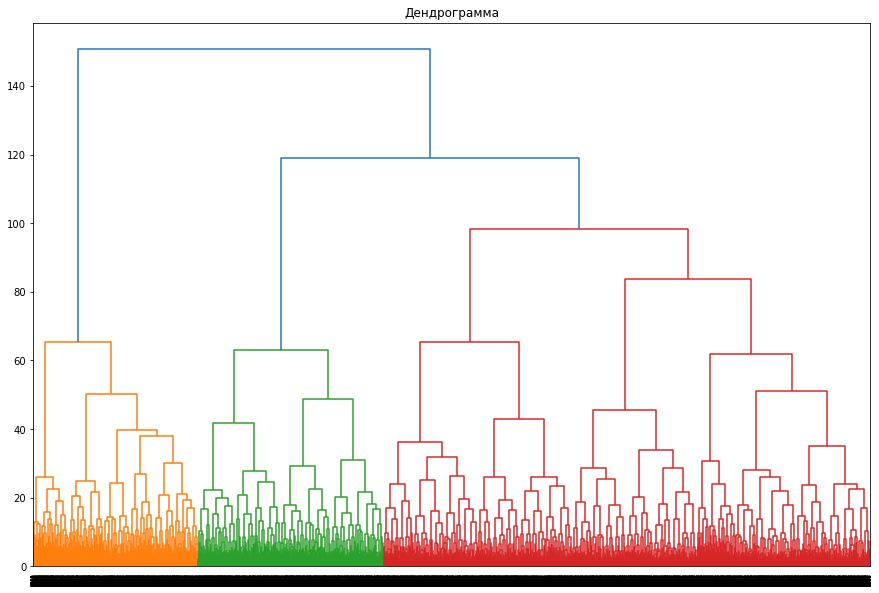

In [20]:
# построим матрицу расстояний функцией linkage()
linked = linkage(X_sc, method = 'ward') 

# визуализируем матрицу в виде дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show()

- Предложенное оптимальное число кластеров - 3.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов:

In [21]:
# зададим модель k_means с числом кластеров 3 и фиксируем значение random_state
km = KMeans(n_clusters=3, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_sc)

Посмотрим на средние значения признаков для кластеров:

In [22]:
# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = df.groupby(['cluster_km']).mean()
clusters

,score,city,gender,age,objects,products,creditcard,loyalty,estimated_salary,churn
cluster_km,,,,,,,,,,
0,653.630335,1.299976,0.578249,36.909091,4.959248,1.538220,0.707499,1.00000,99490.426824,0.000965
1,649.044709,1.330787,0.567346,35.339559,5.125071,1.555744,0.706282,0.00000,100296.412799,0.000000
2,647.453340,0.993107,0.441676,44.038176,4.931601,1.392895,0.698303,0.35631,101022.871066,1.000000


- Более склонны к оттоку клиенты из кластера 2.
- Надежные кластеры - 1 и 0.
- Как и отмечали выше, на удержание влияют: город, пол, возраст, количество пользуемых продуктов.
- Активность клиента имеет значение не во всех группах.

Отразим распределение признаков по кластерам на графиках:

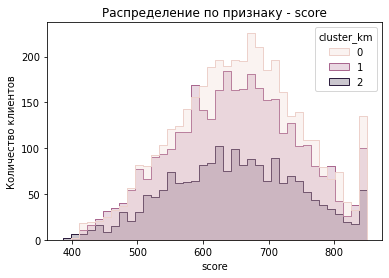

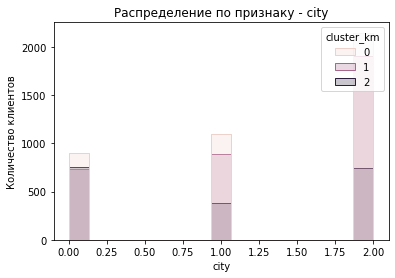

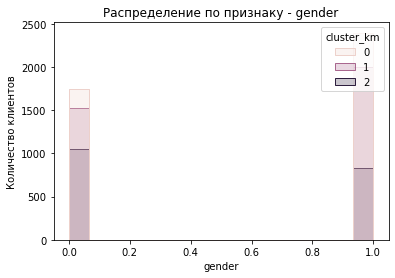

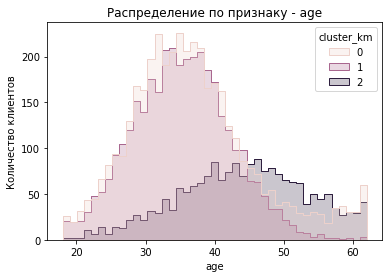

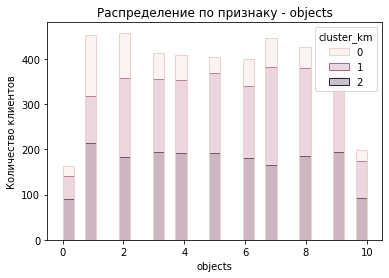

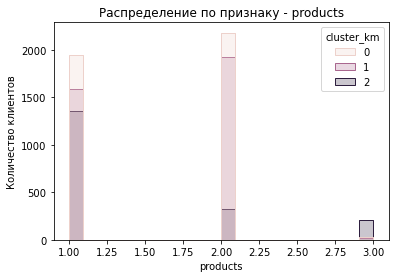

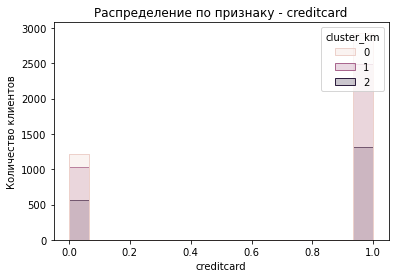

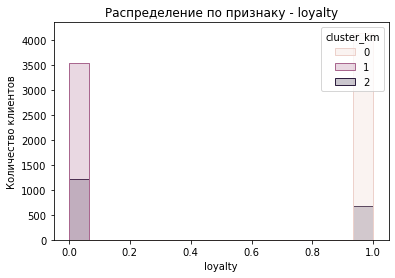

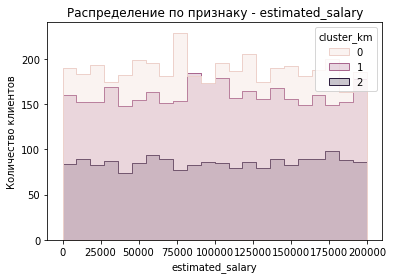

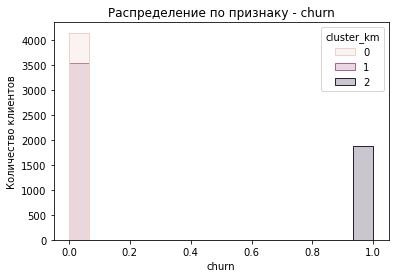

In [23]:
show_clusters(df, 'cluster_km', df.columns)

Можно выделить следующие группы клиентов:
- **Кластер 1.** Самая надёжная группа клиентов (отток составляет 0%): неактивные клиенты отделений банка преимуществено расположенных в г. Ярославле, чаще это мужчины 30-40 лет, пользующиеся 1-2 продуктами.
- **Кластер 0.** Также надёжная группа клиентов (отток составляет менее 0,1%). Группа отличается от 1-го кластера исключительной активностью клиентов.
- **Кластер 2.** Абсолютно ненадёжная группа клиентов со 100% оттоком. Максимальная доля этого кластера представлена в г. Ростове Великом, чаще это женщины 40-50-60 лет, пользующиеся 1 продуктом и являющиеся малоактивными клиентами.

**Выводы:**
- Более склонны к оттоку клиенты из кластера 2;
- Надёжные кластеры - 1 и 0;
- На удержание клиентов влияют: город, пол, возраст, количество пользуемых продуктов;
- Активность клиента имеет не решающее значение. Проверим эту гипотезу позже.

Группы клиентов:
- **Кластер 1.** Самая надёжная группа клиентов (отток составляет 0%): неактивные клиенты отделений банка преимуществено расположенных в г. Ярославле, чаще это мужчины 30-40 лет, пользующиеся 1-2 продуктами.
- **Кластер 0.** Также надёжная группа клиентов (отток составляет менее 0,1%). Группа отличается от 1-го кластера исключительной активностью клиентов.
- **Кластер 2.** Абсолютно ненадёжная группа клиентов со 100% оттоком. Максимальная доля этого кластера представлена в г. Ростове Великом, чаще это женщины 40-50-60 лет, пользующиеся 1 продуктом и являющиеся малоактивными клиентами.

## Проверка гипотез

Исследуем две гипотезы:
1. Средний доход у ушедших и оставшихся клиентов различается.
2. Активность ушедших и оставшихся клиентов различается.

### Сравнение среднего дохода у ушедших и оставшихся клиентов

Сформулируем статистические гипотезы:
- Н0: средний доход у ушедших и оставшихся клиентов одинаков;
- Н1: средний доход у ушедших и оставшихся клиентов различается.

Для проверки гипотезы о равенстве средних двух генеральных совокупностей по взятым из них выборкам используем метод .ttest_ind. Так как выборки по размеру разные, в параметрах укажем equal_var=False. Зададим критический уровень статистической значимости равный 5 %.

In [24]:
# зададим пороговое значение alpha, равное 5 %:
alpha = .05

# проведем t-тест на равенство средних двух выборок:
salary_mean_compare = st.ttest_ind(df.query('churn == 0')['estimated_salary'], df.query('churn == 1')['estimated_salary'], equal_var=False)

# рассчитаем p-value - вероятность получить наблюдаемый или еще более далекий от предполагаемого результат
# при условии, что Н0 верна:
p_value_salary_mean_compare = salary_mean_compare.pvalue

# выведем на экран значение p-value:
print('p-значение:', p_value_salary_mean_compare)

# сравним p-value с пороговым значением alpha:
if p_value_salary_mean_compare < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.4116622269422401
Не получилось отвергнуть нулевую гипотезу.


Значение p-value равно 41 %. Это значит, что вероятность равенства среднего дохода ушедших и оставшихся клиентов довольно высока. Отвергнуть нулевую гипотезу не получилось.

### Сравнение активности ушедших и оставшихся клиентов

Ранее в исследовании мы обнаружили, что клиенты из кластера №1 - это самые надёжные клиенты, но при этом абсолютно неактивные. Это даёт повод заподозрить, что возможно активность ушедших и оставшихся клиентов не сильно отличается. Рассмотрим эту гипотезу.

Сформулируем статистические гипотезы:
- Н0: активность ушедших и оставшихся клиентов одинакова;
- Н1: активность ушедших и оставшихся клиентов различается.

Для проверки гипотезы о равенстве средних двух генеральных совокупностей по взятым из них выборкам используем метод .ttest_ind. Так как выборки по размеру разные, в параметрах укажем equal_var=False. Оставим критический уровень статистической значимости равный 5 %.

In [25]:
# проведем t-тест на равенство средних двух выборок:
loyalty_mean_compare = st.ttest_ind(df.query('churn == 0')['loyalty'], df.query('churn == 1')['loyalty'], equal_var=False)

# рассчитаем p-value - вероятность получить наблюдаемый или еще более далекий от предполагаемого результат
# при условии, что Н0 верна:
p_value_loyalty_mean_compare = loyalty_mean_compare.pvalue

# выведем на экран значение p-value:
print('p-значение:', '{:.20f}'.format(float(p_value_loyalty_mean_compare)))

# сравним p-value с пороговым значением alpha:
if p_value_loyalty_mean_compare < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.00000000000000000000
Отвергаем нулевую гипотезу.


По значению p-value видим, что вероятность одинаковой активности ушедших и оставшихся клиентов критически мала. Нулевую гипотезу отвергаем и принимаем альтернативную гипотезу, а именно: "активность ушедших и оставшихся клиентов различается".

**Выводы:**
- Гипотезу о равенстве среднего дохода у ушедших и оставшихся клиентов отвергнуть не получилось, так как значение p-value составляет 41 %;
- Гипотезу об одинаковой активности ушедших и оставшихся пользователей мы отвергли, так как значение p-value близко к нулю.

## Общие выводы и рекомендации

Проблемы в данных:

- присутствуют пропуски данных в столбце `balance`, которые составляют 36 % от всех наблюдений. Пропуски преобладают в случаях, когда клиент пользуется двумя продуктами. При этом в банках Ростова Великого пропусков нет, хотя клиентов, использующих два продукта, достаточно. Возможно пропуски связаны с недобросовестным заполнением данных, или набор продуктов в разных городах отличается. Заполнение пропусков не целесообразно. На этапе проведения кластеризации и проверки гипотез избавились от столбца `balance`;
- пропуски в данных возможно повлияли на результаты исследования зависимости оттока клиентов от баланса на счете;
- выбросы данных в столбцах `score`, `age` и `product` составляют менее 5% данных. Для дальнейшего анализа данные от выбросов очистили;
- возможно имеет смысл дополнить данные наименованием используемых продуктов для проведения анализа.

Среднестатистический портрет клиента:

- мужчины и женщины молодого возраста (средний возраст - 37 лет),
- клиенты банка г.Ярославля,
- пользуются 1-2 продуктами (довольно часто 1 из них - кредитная карта),
- средняя заработная плата клиента - 100000 руб.,
- имеют в собственности около 5 объектов,
- средний балл кредитного скоринга равен 650,
- баланс на счету (на данных без пропусков) около 120000 руб.,
- клиенты уходят из банка в 20% случаев.

Основные кластеры клиентов:
- Кластер 1. Самая надёжная группа клиентов (отток составляет 0%): неактивные клиенты отделений банка преимуществено расположенных в г. Ярославле, чаще это мужчины 30-40 лет, пользующиеся 1-2 продуктами.
- Кластер 0. Также надёжная группа клиентов (отток составляет менее 0,1%). Группа отличается от 1-го кластера исключительной активностью клиентов.
- Кластер 2. Абсолютно ненадёжная группа клиентов со 100% оттоком. Максимальная доля этого кластера представлена в г. Ростове Великом, чаще это женщины 40-50-60 лет, пользующиеся 1 продуктом и являющиеся малоактивными клиентами.

Признаки, наиболее заметно коррелирующие с целевой переменной (в порядке убывания силы корреляции):
- age (возраст),
- city (город),
- loyalty (активность клиента),
- products (количество продуктов, которыми пользуется клиент),
- gender (пол).

Признаки, наиболее сильно влияющие на отток:
- возраст 40-50-60 лет,
- клиенты отделений банка в г. Ростове Великом,
- малоактивные клиенты,
- пользователи 1 продукта,
- женщины.

Гипотезы:
- гипотезу о равенстве среднего дохода у ушедших и оставшихся клиентов отвергнуть не получилось, так как значение p-value составляет 41 %;
- гипотезу об одинаковой активности ушедших и оставшихся пользователей отвергли, так как значение p-value близко к нулю.

**Рекомендации:**

Целевая группа клиентов находится в кластере 2.

Возможные меры по снижению оттока:
- активнее предлагать пенсионные банковские карты;
- развивать банковские продукты и услуги, интересные зрелым гражданам (сберегательные депозиты, услуги страхования, инвестиционные и брокерские услуги, осуществление консультаций и обучения пользованию интернет-банкингом);
- проанализировать и откорректировать причины оттока клиентов из отделений банка в Ростове Великом;
- стимулировать активное пользование банковскими картами (кэшбэк, бесплатное обслуживание карты при опредленной сумме оплаты покупок);
- активнее знакомить и предлагать клиентам банка новые банковские продукты;
- развивать банковские продукты и услуги, интересные женщинам (кэшбэк при оплате картой услуг фитнес-центров, салонов красоты, центров медицинских услуг; выпуск детских карт, привязанных к счету родителя).